In [1]:
%pylab inline

import lxml
from lxml import etree
import json
import os.path as op
import glob

Populating the interactive namespace from numpy and matplotlib


# Hello world!

In [13]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
pth = r"E:/data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi.ndpa"
pth = r"C:/Users/Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-3 _HE_parenchyme.ndpi.ndpa"
pth = r"C:/Users/Jirik/data/medical/orig/sample_data/SCP003/SCP003.ndpi.ndpa"
# pth = r"C:/Users/JirikE:/data/scaffold/Hamamatsu/PIG-008_P008 LL-P_HE_parenchyme perif..ndpi.ndpa"
tree = etree.parse(pth)

In [14]:
etree.tostring(tree)

b'<annotations>\n    <ndpviewstate id="3">\n        <title/>\n        <details/>\n        <coordformat>nanometers</coordformat>\n        <lens>5,000000</lens>\n        <x>8727882</x>\n        <y>-3657468</y>\n        <z>0</z>\n        <showtitle>0</showtitle>\n        <showhistogram>0</showhistogram>\n        <showlineprofile>0</showlineprofile>\n        <annotation type="freehand" displayname="AnnotateFreehand" color="#0000ff">\n            <measuretype>0</measuretype>\n            <closed>1</closed>\n            <pointlist>\n                <point>\n                    <x>8594940</x>\n                    <y>-3741424</y>\n                </point>\n                <point>\n                    <x>8589488</x>\n                    <y>-3743241</y>\n                </point>\n                <point>\n                    <x>8587669</x>\n                    <y>-3743241</y>\n                </point>\n                <point>\n                    <x>8580395</x>\n                    <y>-3741424</y

In [15]:
viewstates = tree.xpath("//ndpviewstate")
viewstate = viewstates[1]
display(viewstate.xpath(".//title/text()"))
display(viewstate.xpath(".//details/text()"))
ptlists = viewstate.xpath(".//pointlist")
ptlist = ptlists[0]
ptlist.getchildren()
tree.getpath(ptlist)

['inner lobulus']

[]

'/annotations/ndpviewstate[2]/annotation/pointlist'

In [5]:
viewstate.xpath("./coordformat/text()")[0]

'nanometers'

In [6]:
anotations = tree.xpath("//annotation")
anot = anotations[0]
anot.get("color")
display(anot.items())
an_color = anot.get("color")

[('type', 'freehand'),
 ('displayname', 'AnnotateFreehand'),
 ('color', '#00ff00')]

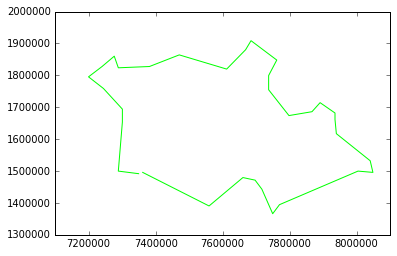

In [7]:
    
an_x = list(map(int, anot.xpath(".//pointlist/point/x/text()")))
an_y = list(map(int, anot.xpath(".//pointlist/point/y/text()")))
plt.plot(an_x, an_y, color=an_color)



# Function

In [9]:
def get_one_annotation(viewstate):
    titles_list = viewstate.xpath(".//title/text()")
    if len(titles_list) == 0:
        an_title = ""
    elif len(titles_list) == 1:
        an_title = titles_list[0]
    else:
        raise ValueError("More than one title in viewstate")
    
    annotations = viewstate.xpath(".//annotation")
    if len(annotations) > 1:
        raise ValueError("More than one annotation found")
    annot = annotations[0]
    an_color = annot.get("color")
#     display(len(annotation))
    an_x = list(map(int, annot.xpath(".//pointlist/point/x/text()")))
    an_y = list(map(int, annot.xpath(".//pointlist/point/y/text()")))
    return dict(title=an_title, color=an_color, x=an_x, y=an_y)
    
    
# get_one_annotation(viewstates[2])

In [9]:
viewstates = tree.xpath("//ndpviewstate")
all_anotations = list(map(get_one_annotation, viewstates))

In [10]:
all_anotations

[{'title': '',
  'color': '#00ff00',
  'x': [7349195,
   7288523,
   7300659,
   7300659,
   7244035,
   7199542,
   7239983,
   7276392,
   7288523,
   7381557,
   7470538,
   7612117,
   7668742,
   7684920,
   7761771,
   7737503,
   7737503,
   7798175,
   7866941,
   7891213,
   7935707,
   7935707,
   7939749,
   8040866,
   8048961,
   8004462,
   7769865,
   7749634,
   7717282,
   7697052,
   7660653,
   7559530,
   7361326],
  'y': [1491671,
   1499775,
   1653659,
   1694153,
   1758951,
   1795396,
   1827793,
   1860191,
   1823744,
   1827793,
   1864240,
   1819697,
   1880441,
   1908789,
   1848043,
   1799445,
   1754899,
   1673909,
   1686057,
   1714405,
   1682005,
   1661761,
   1617212,
   1532172,
   1495725,
   1499775,
   1394483,
   1366137,
   1443078,
   1471426,
   1479525,
   1390433,
   1495725]},
 {'title': '',
  'color': '#00ff00',
  'x': [7146954,
   7183358,
   7179311,
   7248077,
   7320885,
   7320885,
   7446266,
   7527173,
   7527173,
   75554

In [11]:
fn = "annotations.json"
with open(fn, 'w') as outfile:
    json.dump(all_anotations, outfile)

# Convert from .ndpa to .json

In [5]:


def ndpa_file_to_json(pth):
    tree = etree.parse(pth)
    viewstates = tree.xpath("//ndpviewstate")
    all_anotations = list(map(get_one_annotation, viewstates))
    fn = pth + ".json"
    with open(fn, 'w') as outfile:
        json.dump(all_anotations, outfile)

In [13]:
# pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi.ndpa"
# ndpa_file_to_json(pth)

# Convert whole directory

In [6]:
def ndpa_to_json(path):
    """
    :param path: path to file or dir contaning .ndpa files
    """
    if op.isfile(path):
        ndpa_file_to_json(path)
    else:
        extended_path = op.join(path, "*.ndpa")
#         print(extended_path)
        files = glob.glob(extended_path)
        for fl in files:
            ndpa_file_to_json(fl)
        
    
    

In [11]:
ndpa_to_json(r"e:data/scaffold/Hamamatsu/")